# Latent Feature Analysis of  OkCupid Profiles : The Relationship Between Number of Latent Groups and “Tweener” Users 

# Loading Main Libraries

In [41]:
### Loading the main libraries
import numpy as np
import warnings #prevent "future warning" errors
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

#Getting Stop words for analysis of profile descriptions
from nltk.corpus import stopwords
stop = stopwords.words('english')

#Loading Models
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans

# Reading and Investigating the data

## Loading Data

In [22]:
#Main data obtained from: https://github.com/rudeboybert/JSE_OkCupid 
#Note I cant include profiles.csv into Github due to its size. 

##Reading the data
data= pd.read_csv("Data/profiles.csv", low_memory=False)

##printing shape and looking at the data
print("Shape of the Data: ",data.shape)
data.head()

Shape of the Data:  (59946, 31)


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


## Investigating Data Composition

In [20]:
#looking at columns, features, and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

## Defining function for feature investigation

In [32]:
#define function for investigating single variables

def investigate(variable,dataSource):
    var = variable
    print ('Unique values: ',np.unique(dataSource[variable].values),"\n")
    print ('Description of data:\n',dataSource[variable].describe(),"\n")
    print ('Value: times present in data set:\n',dataSource[variable].value_counts())
    
#investigating "age", but could by any of the features shown in previous frame
investigate('age',data)

Unique values:  [ 18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69 109 110] 

Description of data:
 count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64 

Value: times present in data set:
 26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      1

# Data Handling and Modification 

## Separating Data into Different Categories


In [33]:
#identifing categorical variables
categorical = ['body_type','diet','drinks','drugs','education','ethnicity','job','offspring',
              'orientation','pets','religion', 'sex','sign','smokes','speaks','status']

#one hot encoding the caterogical data
dataSeparated = pd.get_dummies(data, columns = categorical)
print ('Original data size:',data.shape)
print ('Categoricaly-modified data size:', dataSeparated.shape)

#Removing essays and non-numerical data:

numCols = [x for x in dataSeparated.columns.values if 
          (dataSeparated[x].dtype == np.uint8) or 
          (dataSeparated[x].dtype == np.int64) or
          (dataSeparated[x].dtype == np.float64)]

dataNumeric = dataSeparated[numCols]
print ('Numerical data size:', dataNumeric.shape)

#Only getting the separated categorical data

dataCat = dataNumeric.drop(['age', 'height', 'income'], axis=1)
print ('Categorical data size:', dataCat.shape)
dataCat.head()

#concotenating all the profile essays into 1
preCombinedEssays = (dataSeparated["essay0"].map(str)+ dataSeparated["essay1"].map(str)
+ dataSeparated["essay2"].map(str) + dataSeparated["essay3"].map(str)
+ dataSeparated["essay4"].map(str) + dataSeparated["essay5"].map(str) 
+ dataSeparated["essay6"].map(str) + dataSeparated["essay7"].map(str)
+ dataSeparated["essay8"].map(str) + dataSeparated["essay9"].map(str))


Original data size: (59946, 31)
Categoricaly-modified data size: (59946, 8109)
Numerical data size: (59946, 8097)
Categorical data size: (59946, 8094)


## Separating essays into individual strings/words 

In [ ]:
##Counting Most Popular Words in all the essays

#removing stop words
preCombinedEssays = preCombinedEssays.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

##separating into individual strings/words
combinedEssays = preCombinedEssays.str.split(" ",n=-1,expand=True)

##Counting the number of times each word is said
wordValueCounts = pd.value_counts(combinedEssays.values.flatten())
        
#writing a text file withh the word counts
wordValueCounts = wordValueCounts.reset_index(level=0, inplace=False)
n=0
with open('Data/wordCountsRun.txt', 'w') as f:
    for item in wordValueCounts['index']:
        f.write("%s\n" % wordValueCounts['index'].iloc[n])
        n = n + 1

## Reading most mentioned words and one-hot encoding them as features

In [37]:
#Choose the top "n" words and load them from the proccesed word list:
nwords = 100
words = pd.read_csv('Data/wordCounts.txt', low_memory=False,header=None,error_bad_lines=False,nrows = nwords)
#print(words)

##making a list out of words:
wordList = list(words[0])
#print(wordList)

#removing duplicates
wordList = list(dict.fromkeys(wordList))
#print(mylist)

#counting words in each line and adding them as a collumn to categorical (i.e. "cat") data
bagOfWordsCat = dataCat.copy()
for n in wordList: 
    word  = n
    count = preCombinedEssays.str.count(word) 
    bagOfWordsCat.insert(0,word,count,allow_duplicates=True)

#Removing Duplicated Collumns
bagOfWordsCat = bagOfWordsCat.loc[:,~bagOfWordsCat.columns.duplicated()]

##only getting the bag of words representation of the essays
bagOfWords=bagOfWordsCat[wordList]
print ("bagOfWords shape:",bagOfWords.shape)
print ("bagOfWords + Categorical Data shape:",bagOfWordsCat.shape)


bagOfWords shape: (59946, 98)
bagOfWords + Categorical Data shape: (59946, 8192)


# Data Analyisis (LDA)


## Defining Function for LDA and K-Means to divide users into N-groups

In [70]:
def LDA(NComponents,dataSource):
    """Defining and fitting LDA model"""
    model = LatentDirichletAllocation(n_components = NComponents) #Try different n's for robustness
    model.fit(dataSource.values)
    out = model.transform(dataSource.values)
    components = model.components_
    print ("Transformed Size: ", out.shape)
    print ("Component Size: ", components.shape)

    return out,components


## Running and saving LDA Model to get X latent user categories

In [171]:
# in this demo we only divided the users into 4 categories. However this can be done for any number you desire. 
%%time

transformed,components = LDA(4,bagOfWordsCat)
componentsNorm = components/components.sum(axis=1)[:, np.newaxis]

np.savetxt("LDA_4_BOWCat_transformed1.csv", transformed, delimiter=",")
np.savetxt("LDA_4_BOWCat_components1.csv", components, delimiter=",")

Transformed Size:  (59946, 4)
Component Size:  (4, 8192)
CPU times: user 15min 4s, sys: 6.81 s, total: 15min 10s
Wall time: 15min 13s


## Defining functions to analize the resulting topics/categories

In [65]:
#Choosing the Nth topic/category and analyzing the top chosen percentile 
#(this will tell you which features are more correlated with said topic)
def topicDescription(dataSource,components,topic,percentile):
#   topicData = components[topic, :] #if reading from in-code generated matrix
    topicData = components.iloc[topic,:] #if reading from csv file
    indices = np.where(topicData > np.percentile(topicData, percentile))
    
    #topTopic = pd.DataFrame({'Feature': dataSource.columns.values[indices],'Topic 1 Distribution': topicData[indices]}) #if in-code generated
    topTopic = pd.DataFrame({'Feature': dataSource.columns.values[indices],('Distribution of Topic #'+str(topic+1)): topicData.iloc[indices]}) #if from csv file
    topTopic.sort_values(('Distribution of Topic #'+str(topic+1)), inplace=True, ascending=False)
    
    return display(topTopic.head(n=6))

#Choosing the users that most "belog" to each topic/category
def userDescription(dataSource,transformed,topic,percentile):
#   userData = transformed[:,topic] #if reading from in-code generated matrix
    userData = transformed[topic] #if reading from csv file  
    dummyData = dataSource.copy()
    dummyData.insert(0, ("Weight of topic #"+ str(topic+1)), userData)
    dummyData.sort_values(("Weight of topic #"+ str(topic+1)), inplace=True, ascending=False)

    return dummyData

## Loading Values from previous avalysis where N = 7 (for time's sake)

In [60]:
##Loading values from LDA
components = pd.read_csv("Data/LDA_10_BOWCat_components1.csv", low_memory=False,header=None) #topic by features
transformed = pd.read_csv("Data/LDA_10_BOWCat_transformed1.csv", low_memory=False,header=None) #users by topic
componentsNorm = components/components.sum(axis=1)[:, np.newaxis] ##normalizing components

print("Shape of input data: ", bagOfWordsCat.shape)
print("Transformed Data Shape: ",transformed.shape)
print("Shape of feature components: ", components.shape)

N = 7 - 1 

Shape of input data:  (59946, 8192)
Transformed Data Shape:  (59946, 10)
Shape of feature components:  (10, 8192)


## Identifing which words best correlate to a particular category/topic

In [66]:
#Analyizing Topic Feature Composition
for i in range(N):
    topicDescription(bagOfWordsCat,componentsNorm,i,80) 

,Feature,Distribution of Topic #1
83,go,0.044234
1,year,0.042916
89,life,0.041781
6,life.,0.040588
23,eat,0.037965
91,get,0.033931


,Feature,Distribution of Topic #2
8190,status_single,0.065964
424,orientation_straight,0.061760
486,sex_m,0.049734
134,drugs_never,0.044838
132,drinks_socially,0.041619
535,smokes_no,0.040591


,Feature,Distribution of Topic #3
22,movie,0.073818
54,movies,0.054140
97,like,0.046214
96,love,0.045088
77,favorite,0.043663
35,watch,0.039271


,Feature,Distribution of Topic #4
81,work,0.055151
83,go,0.041530
92,time,0.033935
42,play,0.033722
97,like,0.031217
65,read,0.030442


,Feature,Distribution of Topic #5
83,go,0.123393
95,good,0.074104
85,friends,0.043366
71,food,0.033201
96,love,0.030390
52,family,0.029823


,Feature,Distribution of Topic #6
83,go,0.072565
97,like,0.057160
4,art,0.035074
92,time,0.028707
91,get,0.028243
23,eat,0.026769


## Identifing which users best correlate to a particular category/topic

In [74]:
##Analyzing Topic User Composition (Note the index is the user number)
userByGroups=userDescription(bagOfWordsCat,transformed,0,80)
userByGroups=userDescription(userByGroups,transformed,1,80)
userByGroups=userDescription(userByGroups,transformed,2,80)
userByGroups=userDescription(userByGroups,transformed,3,80)
userByGroups=userDescription(userByGroups,transformed,4,80)
userByGroups=userDescription(userByGroups,transformed,5,80)
userByGroups=userDescription(userByGroups,transformed,6,80)

userByGroups[userByGroups.columns[range(N+1)]].head(n=5)

,Weight of topic #7,Weight of topic #6,Weight of topic #5,Weight of topic #4,Weight of topic #3,Weight of topic #2,Weight of topic #1
43166,0.992620,0.000820,0.000820,0.000820,0.000820,0.000820,0.000820
1886,0.991664,0.000926,0.000926,0.000926,0.000926,0.000926,0.000926
36883,0.990997,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
30567,0.984477,0.001725,0.001725,0.001725,0.001725,0.001725,0.001725
22529,0.954271,0.001064,0.001064,0.001064,0.001064,0.037216,0.001064


## Creating topic for users that do not correlate to any particular category/topic (i.e. tweeners)

In [75]:
#defining the tweener group
wordList1 = list(userByGroups.columns.values)
topicList  = wordList1[0:N] #N is the number of topics

#inserting the column to data frame
userByGroups.insert(0,"Tweener",userByGroups[topicList].median(axis=1))

#sorting
userByGroups.sort_values("Tweener", inplace=True, ascending=False)

#printing
userByGroups[userByGroups.columns[range(N+2)]].head(n=5)

,Tweener,Weight of topic #7,Weight of topic #6,Weight of topic #5,Weight of topic #4,Weight of topic #3,Weight of topic #2,Weight of topic #1
38868,0.242314,0.254255,0.254594,0.245755,0.001087,0.238872,0.001087,0.001087
33265,0.235772,0.255112,0.002273,0.259704,0.227108,0.002273,0.244436,0.002273
42073,0.232203,0.000944,0.258868,0.251398,0.213009,0.271063,0.000944,0.000944
56277,0.231898,0.224289,0.001010,0.250070,0.239506,0.280073,0.001010,0.001010
40069,0.230216,0.234580,0.255508,0.002632,0.002632,0.268266,0.225852,0.002632


## Creating Histogram showing the correlating coefficient for "tweeners" (the lower the user coefficients the less lilkely they are tweeners)

Text(0, 0.5, 'Counts')

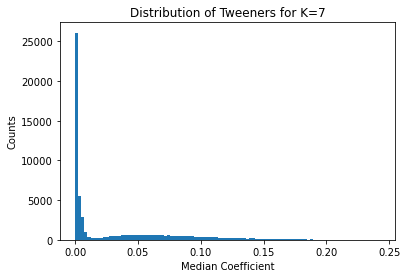

In [77]:
plt.hist(userByGroups["Tweener"], bins=100)
plt.title("Distribution of Tweeners for K=7")
plt.xlabel("Median Coefficient")
plt.ylabel("Counts")